In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gpeboxclean import GPETimeEv as gpe
from classicalfield import FiniteTempGPE as gpecl

In [2]:
from scipy.fft import fft2, ifft2, fftshift, ifftshift, dstn, idstn

No vortices to be spawned
Total Imag Time:  54.754698038101196
shape:  (1024, 1024)


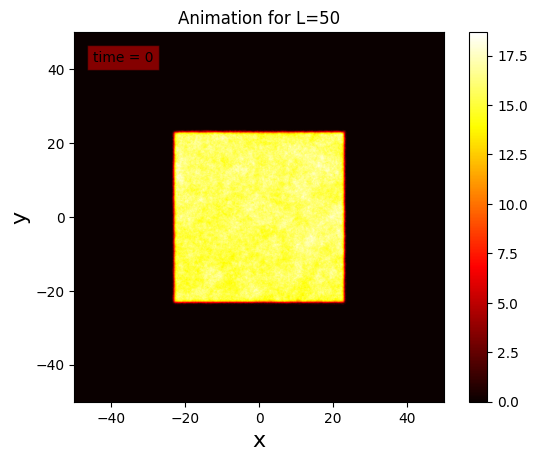

In [12]:
g = gpecl(numRealSteps =3000, npoints = 2**8, Nsamples = 1, runAnim = True, animFileName = 't1_1000_fft2.mp4', Tfact = 1/1000, dst = False) # changed the box file to be 2**8 hard coded - change back
# later 

In [ ]:
coef = g.winL/g.dx**2

In [74]:
print(g.gpeobj.g*200)

0.9765625


In [ ]:
## fix import psi part in the classicialfield.py file 
## keep testing DST stuff 

In [65]:
imp = np.savetxt('intermediate_psi_fft.csv', g.snaps[-1])

In [52]:
print(np.shape(g.snaps))

(121, 1024, 1024)


IndexError: index 50 is out of bounds for axis 0 with size 3

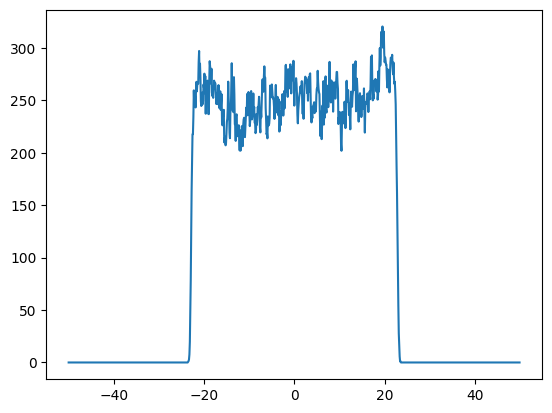

In [13]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.snaps[0][len(g.snaps[0])//2])**2)
plt.plot(g.xi[0][0], np.abs(g.snaps[50][len(g.snaps[-1])//2])**2)

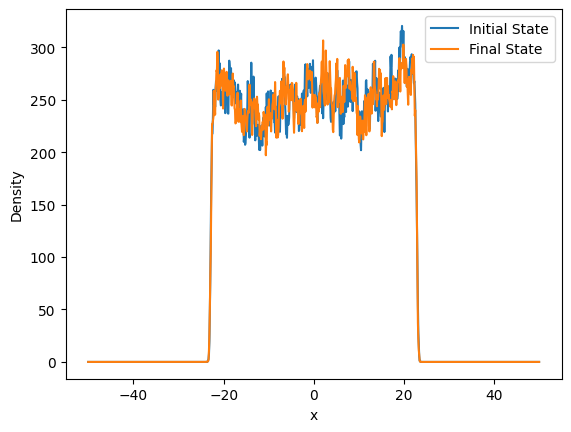

In [14]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.snaps[0][len(g.snaps[0])//2])**2, label = 'Initial State')
plt.plot(g.xi[0][0], np.abs(g.snaps[-1][len(g.snaps[-1])//2])**2, label = 'Final State')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend() 
#plt.savefig('dens_figure_fft')

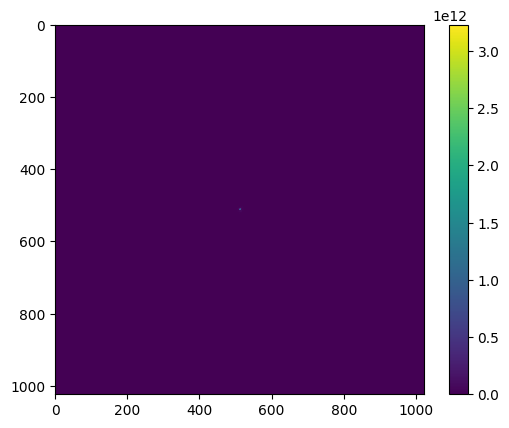

In [20]:
plt.figure() 
plt.imshow(np.abs(fft2(g.snaps[-1]))**2)
plt.colorbar() 

C:\Users\TQC User\AppData\Local\Temp\ipykernel_26828\1241424799.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(fftshift(g.ki[0][0]), fftshift(coef**2*2*g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')


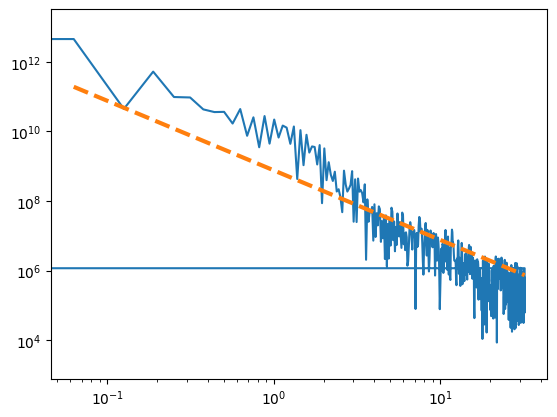

In [59]:
coef = g.winL/g.dx**2
plt.figure() 
# plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[0])[0])**2)
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[-1])[0])**2)
plt.plot(fftshift(g.ki[0][0]), fftshift(coef**2*2*g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')


plt.yscale('log')
plt.xscale('log')

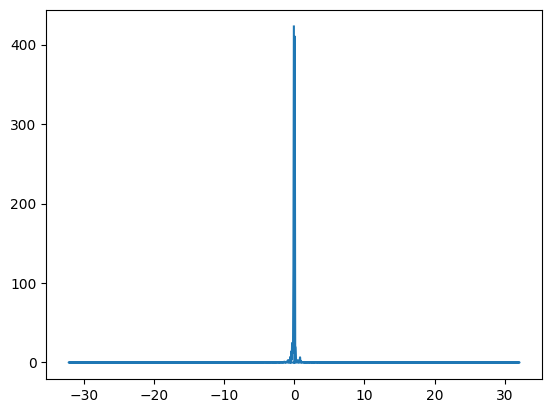

In [11]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(g.genPsiK()[0])**2)

C:\Users\TQC User\AppData\Local\Temp\ipykernel_28040\3816061185.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(fftshift(g.ki[0][0]), fftshift(coef**2*2*g.T/g.ki[0][0]**2), linewidth= 3, linestyle = '--', label = 'Theory')


Text(0, 0.5, 'Density')

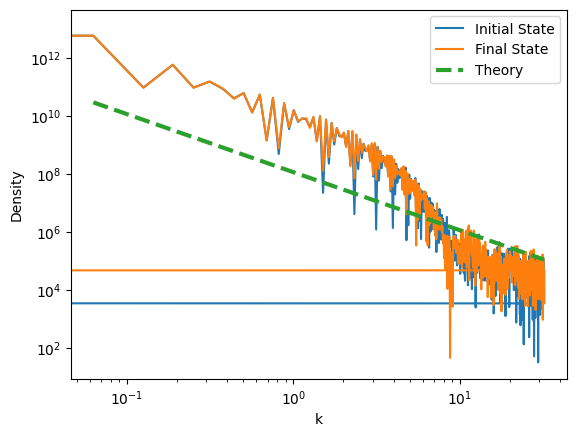

In [16]:
coef = g.winL/g.dx**2
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[0])[0])**2, label = 'Initial State')
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[-1])[0])**2, label = 'Final State')
plt.plot(fftshift(g.ki[0][0]), fftshift(coef**2*2*g.T/g.ki[0][0]**2), linewidth= 3, linestyle = '--', label = 'Theory')

plt.legend() 
plt.yscale('log')
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('Density')
#plt.savefig('mom_figure_fft')

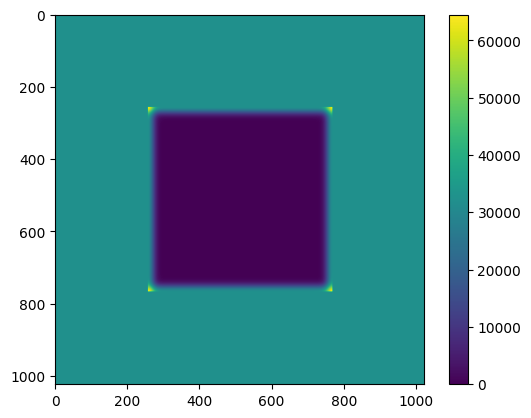

In [3]:
plt.figure() 
plt.imshow(g.Vbox)

plt.colorbar() 

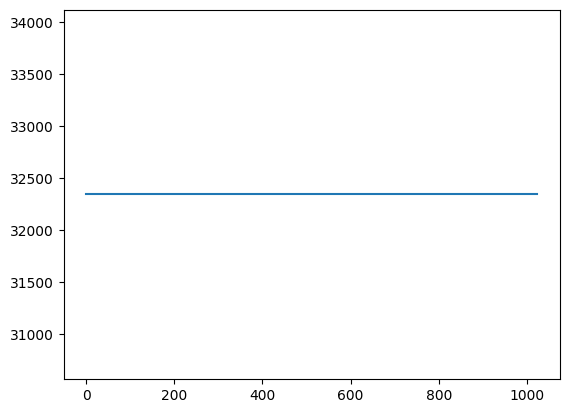

In [14]:
plt.figure() 
plt.plot(g.Vbox[-g.L//2])

In [88]:
V = 0
height = g.kmax**2/2*10 # adjust this height coefficient as needed 
#self.height =5
for i in range(g.dim):
    V += height * np.array(np.power(np.e, -0.7*(g.xi[i] - np.ones_like(g.xi[i])*g.L/2)**2) + np.power(np.e, -0.7*(g.xi[i] + np.ones_like(g.xi[i])*g.L/2)**2))
    #V[np.abs(g.xi[i])>g.L//2] = g.height 
V[V<g.tol] = 0.0 # set values close to 0 to be 0
V[np.abs(g.xi[0])>=g.L//2] = height 
V[np.abs(g.xi[1])>=g.L//2] = height



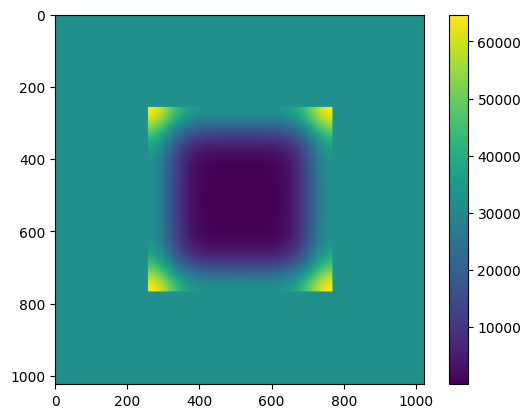

In [86]:
# V[np.abs(g.xi[0])>=g.L//2] = g.height 
# V[np.abs(g.xi[1])>=g.L//2] = g.height 



plt.figure() 
plt.imshow(V)
# plt.hlines(256, 0, 1000)
# plt.vlines(256, 0, 1000)
# plt.scatter(256, 256)
# plt.xlim(256, 280)
# plt.ylim(256, 280)
plt.colorbar() 

In [51]:
print(V[256+1,256])

32340.71970148961


In [94]:
print(g.L//2/g.dx)
print(g.kmax**2/2)

256.0
3234.0719701489606


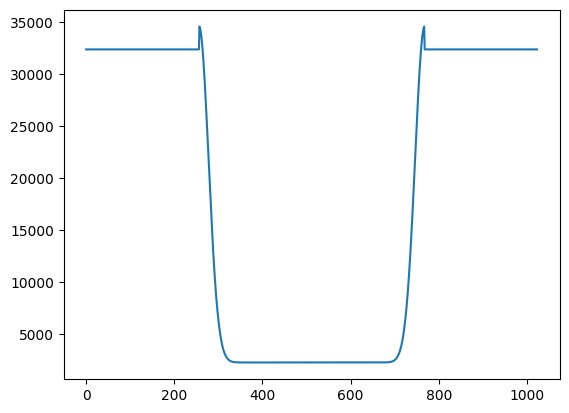

In [89]:
plt.figure() 
plt.plot(V[:,256+50])

In [80]:
V = 0
height = g.kmax**2/2*10 # adjust this height coefficient as needed 
#self.height =5
for i in range(2):
    V += height * np.array(np.power(np.e, -2*(g.xi[i] - np.ones_like(g.xi[i])*g.L/2)**2) + np.power(np.e, -2*(g.xi[i] + np.ones_like(g.xi[i])*g.L/2)**2))
    #V[np.abs(g.xi[i])>g.L//2] = g.height 
V[V<g.tol] = 0.0 # set values close to 0 to be 0
V[np.abs(g.xi[0])>=g.L//2] = g.height 
# V[np.abs(g.xi[1])>=g.L//2] = g.height 

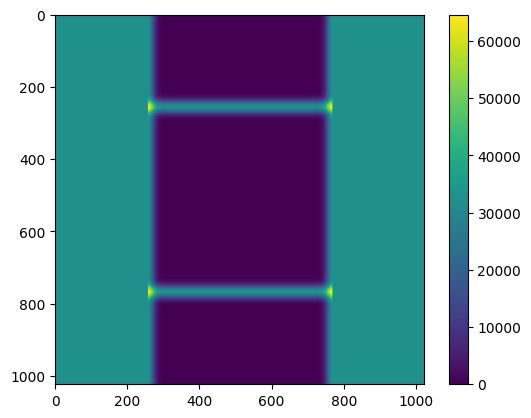

In [81]:
plt.figure() 
plt.imshow(V)
plt.colorbar() 